In [2]:
!pip install flash_attn -q timm -q
!pip install accelerate -q
!pip install einops -q
!pip install requests

In [3]:
import requests

import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForCausalLM 


device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-large", torch_dtype=torch_dtype, trust_remote_code=True).to(device)
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)



config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
!pip install aura-sr -q

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [7]:
from aura_sr import AuraSR
aura_sr = AuraSR.from_pretrained("fal/AuraSR-v2")

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/222 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

LICENSE.md:   0%|          | 0.00/18.6k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

model.ckpt:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

In [8]:
from PIL import Image

image = Image.open("/kaggle/input/driving-image/tolu.jpeg").convert("RGB")
upscaled_image = aura_sr.upscale_4x_overlapped(image)
upscaled_image.save("upscaled_image.png")

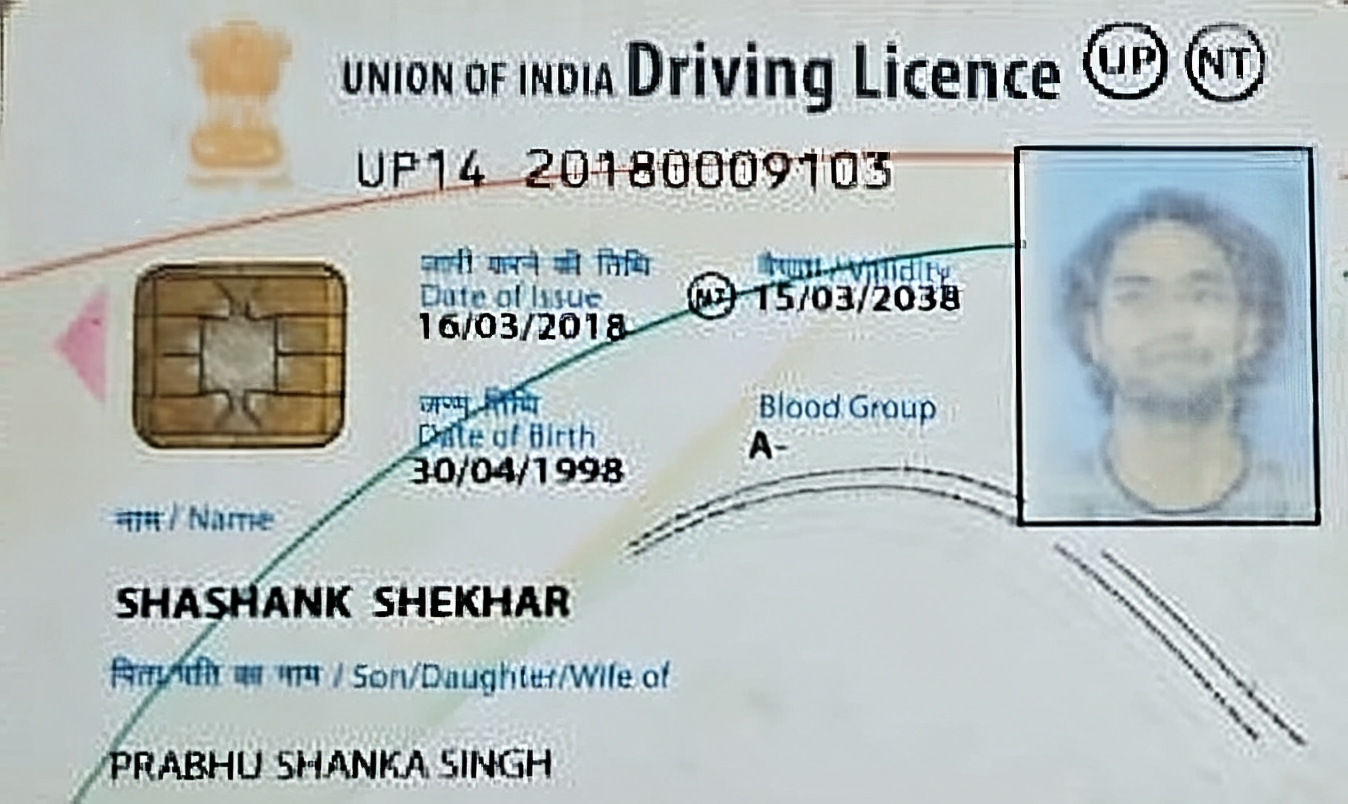

In [9]:
upscaled_image

In [10]:
image.size, upscaled_image.size

((337, 201), (1348, 804))

In [11]:
prompt = "<OCR>"

url = "/kaggle/input/driving-image/tolu.jpeg"
image = Image.open(url)

inputs = processor(text=prompt, images=image, return_tensors="pt").to(device, torch_dtype)

generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=1024,
    num_beams=3,
    do_sample=False
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

parsed_answer = processor.post_process_generation(generated_text, task="<OCR>", image_size=(image.width, image.height))

print(parsed_answer)


{'<OCR>': 'UNION OF INDIA Driving LicenceUPNTUP14 20180009103Date of Issue16/03/201815/032038Blood GroupDite of Birth30/04/1998Aमार / NameSHASHANK SHEKHARPRABHU SHANKA SINGH'}


In [12]:
print(parsed_answer['<OCR>'])

UNION OF INDIA Driving LicenceUPNTUP14 20180009103Date of Issue16/03/201815/032038Blood GroupDite of Birth30/04/1998Aमार / NameSHASHANK SHEKHARPRABHU SHANKA SINGH
